In [ ]:
# Question 0: Create a DataFrame with three rows and four columns. Name the 
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


In [ ]:
df = pd.read_csv("lc_large_no_missing.csv")
df.head(5)

,loan_status,loan_status_numeric,loan_amnt,issue_d,term,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,title,purpose,emp_title,emp_length,home_ownership,annual_inc,verification_status,acc_now_delinq,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_rev_hi_lim,dti,grade,sub_grade
0,Current,5,6400,12/1/2018,36 months,8.81,202.96,402.79,313.09,89.70,0.0,Business,small_business,Assistant Director for Ecology lab,10+ years,MORTGAGE,95000.0,Source Verified,0,0,3/1/2005,0,72,85,12,0,25844,57.8,0,218083,22,44700,15.27,A,A5
1,Current,5,20000,12/1/2018,36 months,15.02,693.51,1370.33,891.90,478.43,0.0,Business,small_business,Attorney,10+ years,MORTGAGE,85000.0,Source Verified,0,0,2/1/1983,2,85,85,22,0,41294,39.8,216,249134,34,103700,24.99,C,C3
2,Current,5,10000,12/1/2018,36 months,14.47,344.07,676.08,449.67,226.41,0.0,Business,small_business,cfo,1 year,RENT,100000.0,Source Verified,0,5,10/1/2008,1,19,85,10,0,2135,11.7,0,16784,11,18500,8.65,C,C2
3,Fully Paid,6,40000,12/1/2018,60 months,16.14,975.71,40041.25,40000.00,41.25,0.0,Business,small_business,Driver,7 years,RENT,60500.0,Source Verified,0,0,12/1/2011,1,31,85,8,0,798,4.7,0,4353,10,17100,5.79,C,C4
4,Current,5,6300,12/1/2018,36 months,15.02,218.46,431.66,280.96,150.70,0.0,Business,small_business,DSP(DIRECT SERVICE PROFESSIONALS),10+ years,RENT,55000.0,Source Verified,0,0,5/1/2008,0,30,85,6,0,2365,18.3,0,3101,8,12900,11.37,C,C3


In [ ]:
# # Question 1
# Bookmark question for later
# What is the Pearson correlation coefficient r between dti and loan_status_numeric? Do not round your answer; copy/paste

# Store the value in a variable called r and print it out in your .ipynb file (+1)

import pandas as pd
from scipy import stats

df = pd.read_csv("lc_large_no_missing.csv")
r = stats.pearsonr(df.dti, df.loan_status_numeric)
print('r:\t' + str(r[0]))

r:	-0.03917658946303357


In [ ]:
# # Question 2
# Use the appropriate Pandas method to create a correlation matrix for the entire Lending Club dataset (+1). The output will be a DataFrame object. Sort that object by loan_status_numeric descending (+1).
# Which feature has the third largest effect size on loan_status_numeric? Do not consider a variable's effect size on itself as one of the effect sizes.
# # Enter the name of the feature exactly as it appears in your .ipynb code cell output

import pandas as pd
df = pd.read_csv('lc_large_no_missing.csv')
df_corr = df.corr()
df_corr.sort_values(by=['loan_status_numeric'], ascending=False)


,loan_status_numeric,loan_amnt,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,annual_inc,acc_now_delinq,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_rev_hi_lim,dti
loan_status_numeric,1.000000,-0.038629,-0.177829,-0.048488,0.221838,0.303946,-0.061646,-0.126426,0.006148,-0.008940,-0.020538,-0.056561,0.026171,0.024488,-0.010388,-0.027530,0.013306,-0.051028,0.002051,0.049996,0.012935,0.045462,-0.039177
total_rec_prncp,0.303946,0.498898,-0.034058,0.542211,0.970655,1.000000,0.386552,0.040330,0.051619,0.016747,0.012523,0.017793,-0.020378,-0.038197,0.102459,0.015741,0.190560,0.061428,0.007917,0.201271,0.156381,0.201677,-0.016240
total_pymnt,0.221838,0.587512,0.080830,0.619935,1.000000,0.970655,0.588709,0.072749,0.054631,0.020181,0.020804,0.029066,-0.032229,-0.046181,0.117562,0.023663,0.212159,0.106630,0.007140,0.209454,0.165164,0.200990,0.008557
tot_cur_bal,0.049996,0.295327,-0.082138,0.261014,0.209454,0.201271,0.129044,0.020654,0.099410,0.019206,0.044561,0.034255,-0.072376,0.032556,0.263622,-0.050385,0.438882,0.092623,-0.003003,1.000000,0.340438,0.412915,0.048291
total_rev_hi_lim,0.045462,0.343410,-0.183488,0.307494,0.200990,0.201677,0.094173,-0.007711,0.079450,0.007144,-0.058576,0.046157,0.091323,0.050094,0.443092,-0.087824,0.794901,-0.135526,-0.003533,0.412915,0.372614,1.000000,0.086142
mths_since_last_delinq,0.026171,0.024734,-0.086332,0.004324,-0.032229,-0.020378,-0.052137,-0.049588,-0.013066,-0.115837,-0.555900,-0.033789,1.000000,0.019922,-0.056736,0.035629,0.050147,-0.013493,-0.006543,-0.072376,-0.153038,0.091323,0.030744
mths_since_last_record,0.024488,0.029929,-0.039016,0.018085,-0.046181,-0.038197,-0.044681,-0.015751,-0.003413,-0.007070,0.000820,-0.067845,0.019922,1.000000,0.010464,-0.447066,0.032962,0.021253,-0.002774,0.032556,-0.042465,0.050094,0.032702
revol_bal,0.013306,0.316064,-0.020299,0.302358,0.212159,0.190560,0.175810,0.013402,0.080057,0.000285,-0.029550,-0.002146,0.050147,0.032962,0.251041,-0.071071,1.000000,0.275281,-0.004005,0.438882,0.220354,0.794901,0.135161
total_acc,0.012935,0.190381,-0.041039,0.169322,0.165164,0.156381,0.103579,0.008258,0.045988,0.020808,0.113343,0.156654,-0.153038,-0.042465,0.737378,-0.003016,0.220354,-0.102202,0.006058,0.340438,1.000000,0.372614,0.192720
annual_inc,0.006148,0.080534,-0.021638,0.075459,0.054631,0.051619,0.036534,0.007159,1.000000,0.001455,0.008232,0.008157,-0.013066,-0.003413,0.036701,0.001666,0.080057,0.017309,-0.000227,0.099410,0.045988,0.079450,-0.040828


In [ ]:
# # Question 3
# Create a linear regression equation using the the stats module of the scipy package with total_rec_prncp as feature (i.e. x or independent variable) and loan_status_numeric as the label (i.e. y or dependent variable) (+1). Store the value of slope in a variable named m (+1).
# What is the slope of that relationship? Enter it in regular numeric form (i.e. not in scientific form) and do not round
# For example: Input "0.00003124556237418" instead of "3.124556237418e-05"
from scipy import stats

m, b, r, p, err = stats.linregress(df.total_rec_prncp, df.loan_status_numeric)
f"{m:.75f}"


'0.000060293472778967613801698322006927810434717684984207153320312500000000000'

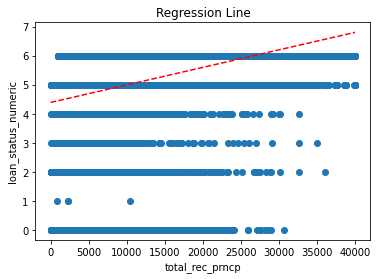

In [ ]:
import matplotlib.pyplot as plt
# Question 4
# Create a scatterplot using the matplotlib.pyplot package based on total_rec_principle as the feature and loan_status_numeric as the label (+1). Overlay/add a regression line to this plot using the equation you generated for the last question (+1).
plt.scatter(df.total_rec_prncp, df.loan_status_numeric)
plt.title('Regression Line')
plt.xlabel('total_rec_prncp')
plt.ylabel('loan_status_numeric')

# Calculate the regression line
m, b, r, p, err = stats.linregress(df.total_rec_prncp, df.loan_status_numeric)
num = int(df.total_rec_prncp.max())
nums = range(num)
plt.plot(nums,m * nums + b,"r--")
plt.show()



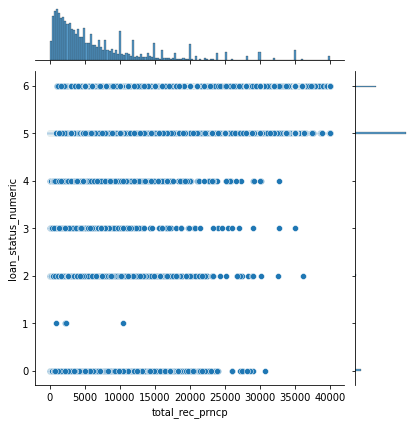

In [ ]:
# # Question 5
# Create a visualization in Seaborn that will mitigate the problem with the scatterplot created in the prior question. In particular, it should help with the problem associated with the scatterplot dots appearing close together and masking each other (+1).
# Which type of visualization would help with this issue (assume sns refers to the Seaborn package)?
# NOTE: some of these plots will take a long time to run. You may want to use Google Colab if your laptop is slow. It may take a couple of minutes. Also do not try to run a pairplot. That will take waaaay too long and is not the one you are looking for.
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(x='total_rec_prncp', y='loan_status_numeric', data=df)

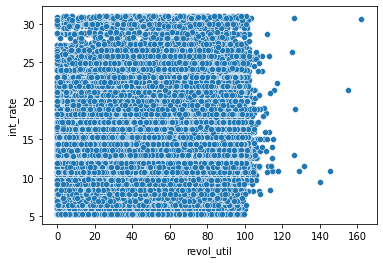

In [ ]:
# # Question 6
# Create a regular scatterplot in Seaborn to show the relationship between revol_util as the x-value and int_rate as the y-value (+1). How would you describe the variance in this relationship?
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='revol_util', y='int_rate')

In [ ]:
# # Question 7
# Calculate the statistics (both the F tests and p-values) needed to determine whether the relationship between revol_util and int_rate exhibits heteroscedasticity (+1). Place the output of these tests in a DataFrame and round the values to 3 decimal places (+1). What do you conclude now about the relationship between revol_util and int_rate?
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.read_csv("lc_large_no_missing.csv")

model = ols(formula='df.revol_util~df.int_rate', data=df).fit()

white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test

output_df.round(3)



,LM stat,LM p-value,F-stat,F p-value
White,355.986,0.0,178.410,0.0
Breusch-Pagan,352.007,0.0,352.825,0.0


In [ ]:
# # Question 8
# We need to assess the relationship between income verification_status (verified, source verified, not verified) and loan_status_numeric. In other words, does verifying the accuracy of a customer's stated income make it more likely that they will stay current on their payments and eventually pay off their loan? Begin by creating dynamic the lists of loan_status_numeric for each verification status (+1). Next, run the appropriate statistical test to determine whether there is a difference in loan_status_numeric across all three types of verification_status at once (+1). What is the effect size score from this test?
# Do not round your answer
import seaborn as sns
import matplotlib.pyplot as plt
groups = df['verification_status'].unique()
df_grouped = df.groupby('verification_status')
master_list = []
for group in groups:
  master_list.append(list(df_grouped.get_group(group)['loan_status_numeric']))
from scipy import stats
f, p = stats.f_oneway(*master_list)
print(f'F:\t{f}')
print(f'p:\t{p}')



F:	449.9101072619299
p:	1.53609447858117e-195


In [ ]:
# # Question 9
# Is the effect size generated in the prior question reliable? In other words, would we expect to see a similar effect size in future samples that are similar to this one?
# In your .ipynb file for this question, print out the value that indicates your answer to this question. Do not round it or modify it in any way. Print only the numeric value without any labels included like you might see in the examples in the book (+1).
print(p)

1.53609447858117e-195


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


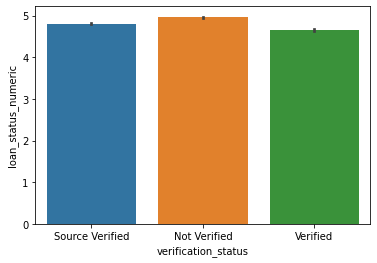

In [ ]:
# # Question 10
# Now that we know that verification_status does have an effect on loan_status_numeric, let's visualization that relationship. Create an appropriate viz using the Seaborn package (+1). How should you interpret this visualization?
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(df['verification_status'], df['loan_status_numeric'])
plt.show()



In [ ]:
# # Question 11
# Is there a statistically significant difference in loan_status_numeric between those with verified versus source_verified income? Generate the appropriate statistical test for comparing only two means (not two or more means) (+1). Stored the measure of effect size in a variable named e and the statistical significance in a variable named s (+1).
import pandas as pd
import numpy as np
from scipy import stats

col = 'verification_status'
label = 'loan_status_numeric'

groups = df[col].unique()          
df_grouped = df.groupby(col)          
group_labels = []                     
for g in groups:                       
  g_list = df_grouped.get_group(g)     
  group_labels.append(g_list[label])   

e, s= stats.ttest_ind(group_labels[0], group_labels[2])
print("e: " + str(round(e, 3)))
print("s: " + str(round(s, 3)))

e: 14.352
s: 0.0


X: 834.689


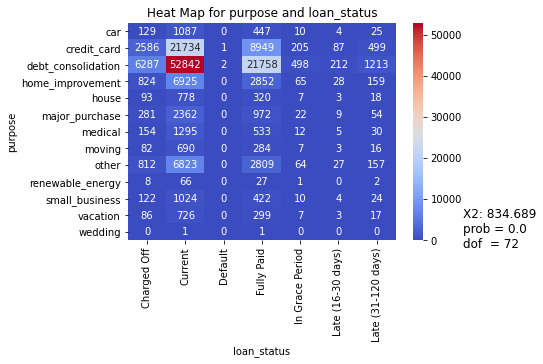

In [ ]:
# # Question 12
# The questions above have been treating loan status as an ordinal, rank-ordered variable. However, sometimes it is better to treat ordinal data as categorical data. Create a Seaborn heatmap based on a Pandas CrossTab to visualize relationship between purpose and loan_status (not loan_status_numeric) (+1). In addition, embed a text string somewhere in or near the image to reflect the appropriate statistical analyses to estimate the relationship between those features as well as the probability that the relationship is due to random chance (+1). Store the value of the effect size in a variable called X and print it out. (+1). What is that value rounded to three decimal places?
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2
crosstab = pd.crosstab(df['purpose'], df['loan_status'])
X, prob, dof, contingency_table = chi2_contingency(crosstab)
textstr  = 'X2: ' + str(round(X, 4))+ '\n'
textstr += 'prob = ' + str(round(p, 4)) + '\n'
textstr += 'dof  = ' + str(dof)
plt.text(0.9, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
ct_df = pd.DataFrame(np.rint(contingency_table).astype('int64'), columns=crosstab.columns, index=crosstab.index)
plt.title('Heat Map for purpose and loan_status')
sns.heatmap(ct_df, annot=True, fmt='d', cmap='coolwarm')

print("X: " + str(round(X, 3)))



In [ ]:
# # Question 13
# Store the value that represents the likelihood that the effect size found in the prior question was due to chance in a variable called prob and print that value (+1). What is the value? Copy it as is from your .ipynb file without any type of conversion. (e.g. if it is in scientific form, leave it that way)
print(prob)


3.0945990555900273e-130
